# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import math

# Importing the Dataset

In [3]:
train=pd.read_csv("/kaggle/input/walmart-forecasting/train.csv")
features=pd.read_csv("/kaggle/input/walmart-forecasting/features.csv")
stores=pd.read_csv("/kaggle/input/walmart-forecasting/stores.csv")


In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# Descriptive analysis

In [7]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [9]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


# Data Pre-processing

# Checking for null values

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [12]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [13]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [14]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

# merging datasets

In [16]:
data = pd.merge(train, stores, on='Store')
data = pd.merge(data, features, on=['Store', 'Date','IsHoliday'])

In [17]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


handling missing data

In [19]:
# Fill missing values in 'MarkDown' columns with their respective means
data['MarkDown1'].fillna(data['MarkDown1'].mean(), inplace=True)
data['MarkDown2'].fillna(data['MarkDown2'].mean(), inplace=True)
data['MarkDown3'].fillna(data['MarkDown3'].mean(), inplace=True)
data['MarkDown4'].fillna(data['MarkDown4'].mean(), inplace=True)
data['MarkDown5'].fillna(data['MarkDown5'].mean(), inplace=True)


In [20]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106


# Converting Date to respective Days,Month and Year

In [21]:
# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract 'Month,' 'Year,' and 'Day_of_Week' from the 'Date' column
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Create a 'Day_of_Week' column with day names
data['Day_of_Week'] = data['Date'].dt.strftime('%A')

# Create an 'Is_Weekend' column with True for Saturday and Sunday
data['Is_Weekend'] = (data['Day_of_Week'].isin(['Saturday', 'Sunday'])).astype(bool)


In [22]:
# Count the occurrences of each day of the week
day_counts = data['IsHoliday'].value_counts()

# Print the counts
print(day_counts)

IsHoliday
False    391909
True      29661
Name: count, dtype: int64


In [23]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Day_of_Week,Is_Weekend
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,Friday,False
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,Friday,False
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,Friday,False
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,Friday,False
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,Friday,False


# Data Encoding

In [24]:
# Define mappings for Is_Holiday
is_holiday_mapping = {False: 0, True: 1}

# Define mappings for Type
type_mapping = {'A': 0, 'B': 1, 'C': 2}

# Define mappings for Day_of_Week
day_of_week_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

# Define mappings for Is_Weekend
is_weekend_mapping = {False: 0, True: 1}

# Apply mappings to the dataset
data['IsHoliday'] = data['IsHoliday'].map(is_holiday_mapping)
data['Type'] = data['Type'].map(type_mapping)
data['Day_of_Week'] = data['Day_of_Week'].map(day_of_week_mapping)
data['Is_Weekend'] = data['Is_Weekend'].map(is_weekend_mapping)

# Print all mappings
print("Is_Holiday Mapping:")
print(is_holiday_mapping)
print("\nType Mapping:")
print(type_mapping)
print("\nDay_of_Week Mapping:")
print(day_of_week_mapping)
print("\nIs_Weekend Mapping:")
print(is_weekend_mapping)


Is_Holiday Mapping:
{False: 0, True: 1}

Type Mapping:
{'A': 0, 'B': 1, 'C': 2}

Day_of_Week Mapping:
{'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

Is_Weekend Mapping:
{False: 0, True: 1}


In [25]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Day_of_Week,Is_Weekend
0,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,4,0
1,1,2,2010-02-05,50605.27,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,4,0
2,1,3,2010-02-05,13740.12,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,4,0
3,1,4,2010-02-05,39954.04,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,4,0
4,1,5,2010-02-05,32229.38,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,4,0


In [26]:
# Count the occurrences of each day of the week
day_counts = data['Is_Weekend'].value_counts()

# Print the counts
print(day_counts)

Is_Weekend
0    421570
Name: count, dtype: int64


splitting into test and train values

In [27]:
data.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Type            False
Size            False
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
Month           False
Year            False
Day_of_Week     False
Is_Weekend      False
dtype: bool

In [28]:

data = data.drop(columns=['Is_Weekend'])

We dropped is_weekend as none of the values were 1.

In [29]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Day_of_Week
0,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,4
1,1,2,2010-02-05,50605.27,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,4
2,1,3,2010-02-05,13740.12,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,4
3,1,4,2010-02-05,39954.04,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,4
4,1,5,2010-02-05,32229.38,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2,2010,4


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

# Data Visualization

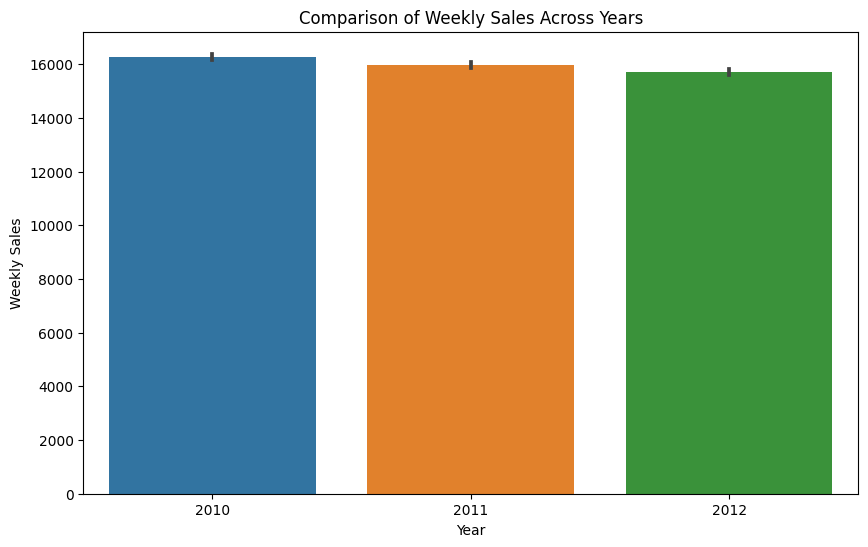

In [38]:
# Create a bar plot for Weekly_Sales across different years
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Weekly_Sales', data=data)  # ci=None removes error bars

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Weekly Sales Across Years')

# Show the plot
plt.show()

It shows that all the years have almost equal value for weekly sales.

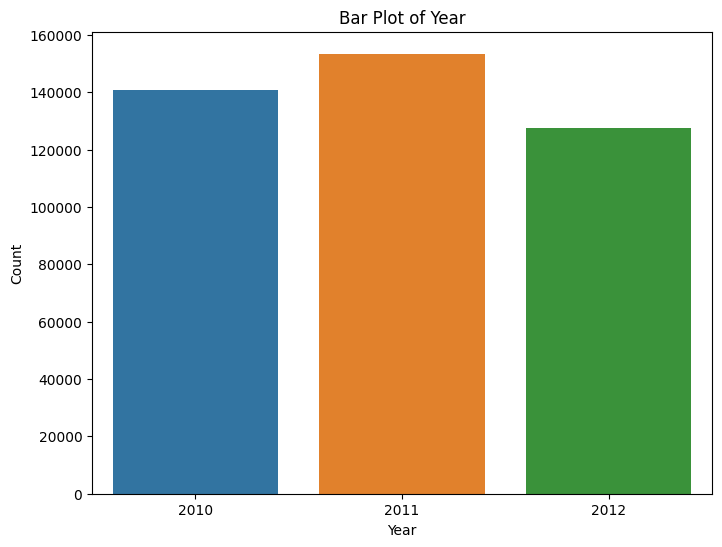

In [36]:
# Create a bar plot for the "Year" column
plt.figure(figsize=(8, 6))
sns.barplot(x=data['Year'].value_counts().index, y=data['Year'].value_counts())

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bar Plot of Year')

# Show the plot
plt.show()

The graph shows that it contains most of the data for year 2011

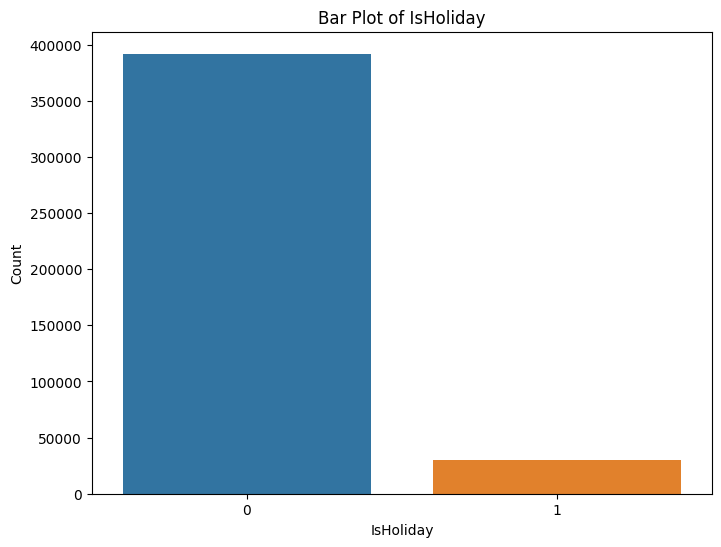

In [35]:
# Create a bar plot for the "IsHoliday" column
plt.figure(figsize=(8, 6))
sns.barplot(x=data['IsHoliday'].value_counts().index, y=data['IsHoliday'].value_counts())

# Add labels and title
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.title('Bar Plot of IsHoliday')

# Show the plot
plt.show()

It means the dataset contains the days with holidays

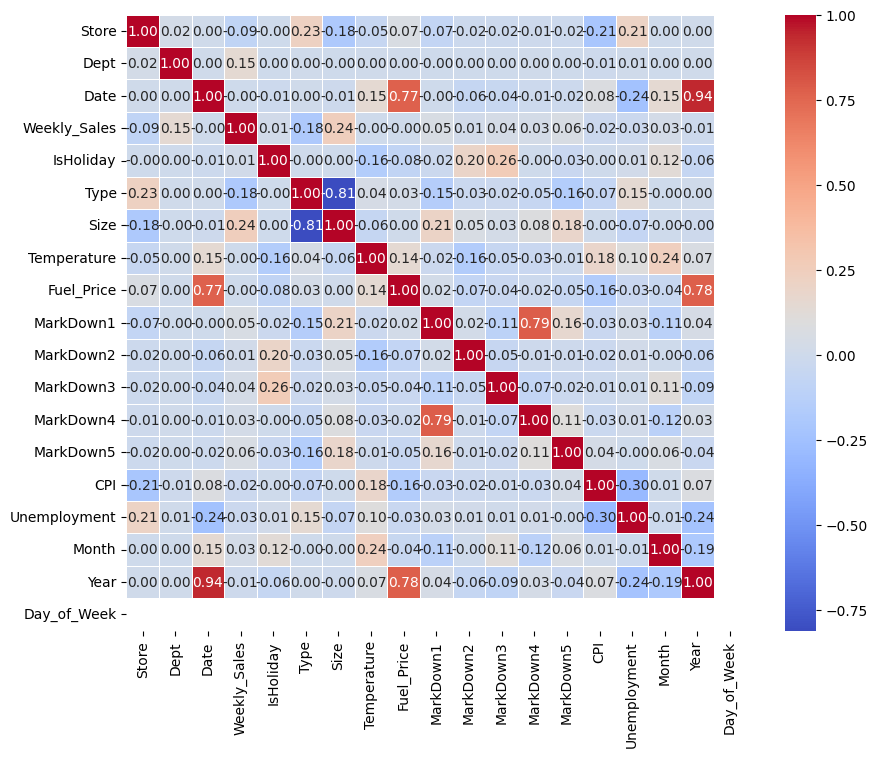

In [32]:
# Compute the correlation matrix
corr = data.corr()

# Increase the height and width of the heatmap
plt.figure(figsize=(10, 8))

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Show the plot
plt.show()

# Training Model

# 1)Random forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define your features (X) and the target variable (y)
X_rf = data.drop(columns=['Weekly_Sales','Date'])
y_rf = data['Weekly_Sales']

# Split the data into a training set (70%) and a testing set (30%)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_rf)

# Calculate R-squared (accuracy), RMSE, and MAE
r2_rf = r2_score(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)

print("Random Forest Model:")
print("R-squared (Accuracy):", r2_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)


Random Forest Model:
R-squared (Accuracy): 0.9625817498533463
Root Mean Squared Error (RMSE): 4438.228933960859
Mean Absolute Error (MAE): 1648.1275767946804


In [45]:
# Create a DataFrame with the input data
input_data = pd.DataFrame({
    'Store': [1],
    'Dept': [1],
    'IsHoliday': [0],
    'Type': [0],
    'Size': [151315],
    'Temperature': [42.31],
    'Fuel_Price': [2.572],
    'MarkDown1': [7246.420196],
    'MarkDown2': [3334.628621],
    'MarkDown3': [1439.421384],
    'MarkDown4': [3383.168256],
    'MarkDown5': [4628.975079],
    'CPI': [211.096358],
    'Unemployment': [8.106],
    'Month': [2],
    'Year': [2010],
    'Day_of_Week':[4]
})

# Use the trained random forest model to make the prediction
predicted_sales = rf_model.predict(input_data)

# Print the predicted weekly sales
print("Predicted Weekly Sales:", predicted_sales[0])


Predicted Weekly Sales: 26689.844299999997


In [46]:
# Create a DataFrame with the input data
input_data = pd.DataFrame({
    'Store': [1],
    'Dept': [5],
    'IsHoliday': [0],
    'Type': [0],
    'Size': [151315],
    'Temperature': [42.31],
    'Fuel_Price': [2.572],
    'MarkDown1': [7246.420196],
    'MarkDown2': [3334.628621],
    'MarkDown3': [1439.421384],
    'MarkDown4': [3383.168256],
    'MarkDown5': [4628.975079],
    'CPI': [211.096358],
    'Unemployment': [8.106],
    'Month': [2],
    'Year': [2010],
    'Day_of_Week':[4]
})

# Use the trained random forest model to make the prediction
predicted_sales = rf_model.predict(input_data)

# Print the predicted weekly sales
print("Predicted Weekly Sales:", predicted_sales[0])


Predicted Weekly Sales: 31683.003299999964


# 2) ARIMA model

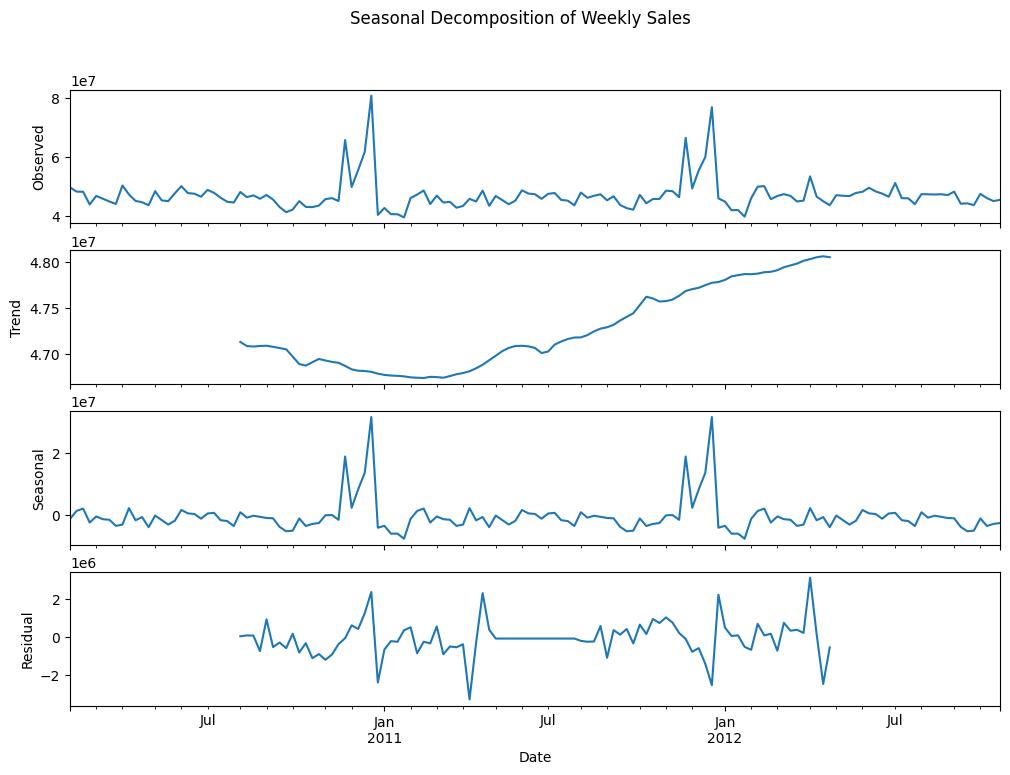

Auto ARIMA Model:
R-squared (Accuracy): -0.25344797480203507
Root Mean Squared Error (RMSE): 1937714.010722254
Mean Absolute Error (MAE): 1477760.429381056


In [42]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is your DataFrame
# If 'Date' is not in datetime format, convert it
data['Date'] = pd.to_datetime(data['Date'])

# Selecting relevant columns for the time series analysis
time_series_columns = ['Date', 'Weekly_Sales']
df_time_series = data[time_series_columns]

# Aggregating sales by date
df_time_series = df_time_series.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Splitting the dataset into training and testing sets
train_size = int(len(df_time_series) * 0.8)
train, test = df_time_series[:train_size], df_time_series[train_size:]

# Performing auto ARIMA model training
model = auto_arima(train['Weekly_Sales'], suppress_warnings=True, seasonal=True, stepwise=True)
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Evaluating the model
r2_arima = r2_score(test['Weekly_Sales'], forecast)
rmse_arima = np.sqrt(mean_squared_error(test['Weekly_Sales'], forecast))
mae_arima = mean_absolute_error(test['Weekly_Sales'], forecast)

# Plotting seasonal decomposition (optional)
decomposition = seasonal_decompose(df_time_series.set_index('Date'), model='additive', period=52)
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.suptitle('Seasonal Decomposition of Weekly Sales')
plt.show()

# Printing the evaluation metrics
print("Auto ARIMA Model:")
print("R-squared (Accuracy):", r2_arima)
print("Root Mean Squared Error (RMSE):", rmse_arima)
print("Mean Absolute Error (MAE):", mae_arima)


# 3)XG Boost

In [43]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset

# Define your features (X) and target (y)
# In this case, we will use 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Year', 'Day_of_Week' as features.
# Define your features (X) and the target variable (y)
X= data.drop(columns=['Weekly_Sales','Date'])
y = data['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost model
xg_model = xgb.XGBRegressor()
xg_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = xg_model.predict(X_test)

# Calculate and print R-squared (accuracy), RMSE, and MAE
r2_xgboost = r2_score(y_test, predictions)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, predictions))
mae_xgboost = mean_absolute_error(y_test, predictions)

print("XGBoost Model:")
print("R-squared (Accuracy):", r2_xgboost)
print("Root Mean Squared Error (RMSE):", rmse_xgboost)
print("Mean Absolute Error (MAE):", mae_xgboost)


XGBoost Model:
R-squared (Accuracy): 0.9331301092436165
Root Mean Squared Error (RMSE): 5933.121885368714
Mean Absolute Error (MAE): 3180.4101097696407


In [47]:
input_data = pd.DataFrame({
    'Store': [1],
    'Dept': [1],
    'IsHoliday': [0],
    'Type': [0],
    'Size': [151315],
    'Temperature': [42.31],
    'Fuel_Price': [2.572],
    'MarkDown1': [7246.420196],
    'MarkDown2': [3334.628621],
    'MarkDown3': [1439.421384],
    'MarkDown4': [3383.168256],
    'MarkDown5': [4628.975079],
    'CPI': [211.096358],
    'Unemployment': [8.106],
    'Month': [2],
    'Year': [2010],
    'Day_of_Week': [4]
})
# Make predictions for the input data
predictions = xg_model.predict(input_data)

print("Predicted Weekly_Sales:", predictions[0])

Predicted Weekly_Sales: 31784.621


In [48]:
# Assuming you have calculated the R-squared values as r2_rf, r2_arima, and r2_xgboost

best_model_name = None

if r2_rf > r2_arima and r2_rf > r2_xgboost:
    best_model_name = "Random Forest"
    best_model = rf_model  # Use the Random Forest model

elif r2_arima > r2_rf and r2_arima > r2_xgboost:
    best_model_name = "ARIMA"  # Use ARIMA model
    best_model = arima_model

else:
    best_model_name = "XGBoost"
    best_model = xg_model  # Use the XGBoost model

print(f"The best model is {best_model_name}")



The best model is Random Forest


# Saving Model.pkl file 

In [ ]:
import pickle
pickle.dump(rf_model,open('model.pkl','wb'))